<a href="https://colab.research.google.com/github/Megha2004/IBM_DataScience/blob/main/IBM_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [ ]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

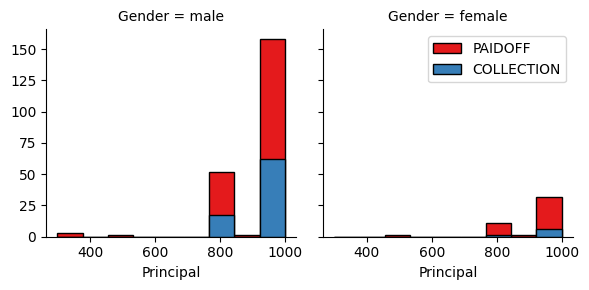

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


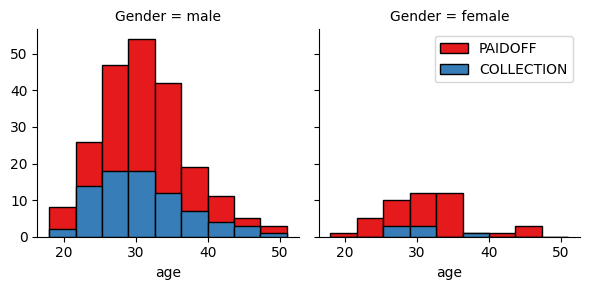

In [ ]:

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

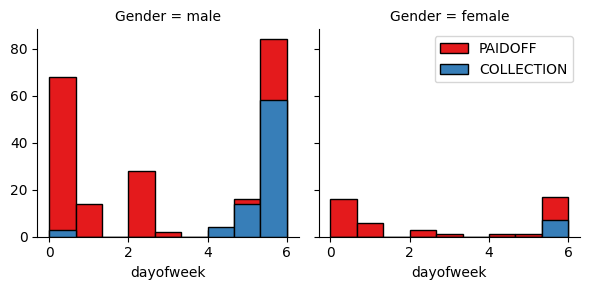

In [ ]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [ ]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [ ]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [ ]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [ ]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
X = Feature
X[0:5]


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
for k in range(1, 10):
    knn_model  = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    knn_yhat = knn_model.predict(x_test)
    print("For K = {} accuracy = {}".format(k,accuracy_score(y_test,knn_yhat)))

For K = 1 accuracy = 0.6428571428571429
For K = 2 accuracy = 0.5857142857142857
For K = 3 accuracy = 0.7428571428571429
For K = 4 accuracy = 0.7
For K = 5 accuracy = 0.7428571428571429
For K = 6 accuracy = 0.7142857142857143
For K = 7 accuracy = 0.8
For K = 8 accuracy = 0.7571428571428571
For K = 9 accuracy = 0.7428571428571429


In [ ]:
best_knn_model = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
best_knn_model

KNeighborsClassifier(n_neighbors=7)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_knn_model.predict(x_train),pos_label = "PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_knn_model.predict(x_test),pos_label = "PAIDOFF"))

print("Train set Accuracy (F1): ", f1_score(y_train, best_knn_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_knn_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7759336099585062
Test set Accuracy (Jaccard):  0.7741935483870968
Train set Accuracy (F1):  0.7942614463042823
Test set Accuracy (F1):  0.8


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
for d in range(1, 10):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d).fit(x_train, y_train)
    dt_yhat = dt.predict(x_test)
    accuracy = accuracy_score(y_test, dt_yhat)
    print("For depth = {} the accuracy score is {:.4f}".format(d, accuracy))

For depth = 1 the accuracy score is 0.7857
For depth = 2 the accuracy score is 0.7857
For depth = 3 the accuracy score is 0.6143
For depth = 4 the accuracy score is 0.6143
For depth = 5 the accuracy score is 0.6429
For depth = 6 the accuracy score is 0.7714
For depth = 7 the accuracy score is 0.7571
For depth = 8 the accuracy score is 0.7571
For depth = 9 the accuracy score is 0.6571


In [ ]:
print("The best value of depth is d = 2 ")

The best value of depth is d = 2 


In [ ]:
best_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2).fit(x_train, y_train)
best_dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

jaccard_train = jaccard_score(y_train, best_dt_model.predict(x_train), pos_label="PAIDOFF")
print("Train set Accuracy (Jaccard):", jaccard_train)

jaccard_test = jaccard_score(y_test, best_dt_model.predict(x_test), pos_label="PAIDOFF")
print("Test set Accuracy (Jaccard):", jaccard_test)

f1_train = f1_score(y_train, best_dt_model.predict(x_train), average='weighted')
print("Train set Accuracy (F1):", f1_train)

f1_test = f1_score(y_test, best_dt_model.predict(x_test), average='weighted')
print("Test set Accuracy (F1):", f1_test)

Train set Accuracy (Jaccard): 0.7427536231884058
Test set Accuracy (Jaccard): 0.7857142857142857
Train set Accuracy (F1): 0.6331163939859591
Test set Accuracy (F1): 0.6914285714285714


Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score

In [ ]:
kernels = ('linear', 'poly', 'rbf', 'sigmoid')
for k in kernels:
    svm_model = svm.SVC(kernel=k).fit(x_train, y_train)
    svm_yhat = svm_model.predict(x_test)
    f1 = f1_score(y_test, svm_yhat, average='weighted')
    print("For kernel: {}, the F1 score is: {:.4f}".format(k, f1))

For kernel: linear, the F1 score is: 0.6914
For kernel: poly, the F1 score is: 0.7065
For kernel: rbf, the F1 score is: 0.7276
For kernel: sigmoid, the F1 score is: 0.6893


In [ ]:
best_svm = svm.SVC(kernel='rbf').fit(x_train,y_train)
best_svm

SVC()

In [ ]:
from sklearn.metrics import f1_score, jaccard_score

# Assuming you have a trained SVM model named 'best_svm'

# Calculate Jaccard similarity for the training set
jaccard_train = jaccard_score(y_train, best_svm.predict(x_train), pos_label='PAIDOFF')
print("Train set Accuracy (Jaccard):", jaccard_train)

# Calculate Jaccard similarity for the testing set
jaccard_test = jaccard_score(y_test, best_svm.predict(x_test), pos_label='PAIDOFF')
print("Test set Accuracy (Jaccard):", jaccard_test)

# Calculate F1 score for the training set
f1_train = f1_score(y_train, best_svm.predict(x_train), average='weighted')
print("Train set Accuracy (F1):", f1_train)

# Calculate F1 score for the testing set
f1_test = f1_score(y_test, best_svm.predict(x_test), average='weighted')
print("Test set Accuracy (F1):", f1_test)


Train set Accuracy (Jaccard): 0.7560975609756098
Test set Accuracy (Jaccard): 0.7272727272727273
Train set Accuracy (F1): 0.7682165861513688
Test set Accuracy (F1): 0.7275882012724117


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [ ]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4920179847937498
When Solver is saga, logloss is : 0.4920175972391681
When Solver is liblinear, logloss is : 0.5772287609479654
When Solver is newton-cg, logloss is : 0.492017801467927
When Solver is sag, logloss is : 0.49201855991929316


In [ ]:
best_lr_model = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)
best_lr_model

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
from sklearn.metrics import f1_score, jaccard_score

# Assuming you have a trained Logistic Regression model named 'best_lr_model'

# Calculate Jaccard similarity for the training set
jaccard_train = jaccard_score(y_train, best_lr_model.predict(x_train), pos_label='PAIDOFF')
print("Train set Accuracy (Jaccard):", jaccard_train)

# Calculate Jaccard similarity for the testing set
jaccard_test = jaccard_score(y_test, best_lr_model.predict(x_test), pos_label='PAIDOFF')
print("Test set Accuracy (Jaccard):", jaccard_test)

# Calculate F1 score for the training set
f1_train = f1_score(y_train, best_lr_model.predict(x_train), average='weighted')
print("Train set Accuracy (F1):", f1_train)

# Calculate F1 score for the testing set
f1_test = f1_score(y_test, best_lr_model.predict(x_test), average='weighted')
print("Test set Accuracy (F1):", f1_test)

Train set Accuracy (Jaccard): 0.7351778656126482
Test set Accuracy (Jaccard): 0.6764705882352942
Train set Accuracy (F1): 0.7341146337750953
Test set Accuracy (F1): 0.6670522459996144


Model Evaluation using Test set

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
test_df = pd.read_csv('/content/loan_train.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [ ]:

# data processing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [ ]:
# data processing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [ ]:
# KNN
knn_yhat = best_knn_model.predict(x_loan_test)
jacc1 = round(jaccard_score(y_loan_test, knn_yhat,pos_label = "PAIDOFF"), 2)

# Decision Tree
dt_yhat = best_dt_model.predict(x_loan_test)
jacc2 = round(jaccard_score(y_loan_test, dt_yhat,pos_label = "PAIDOFF"), 2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
jacc3 = round(jaccard_score(y_loan_test, svm_yhat,pos_label = "PAIDOFF"), 2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
jacc4 = round(jaccard_score(y_loan_test, lr_yhat,pos_label = "PAIDOFF"), 2)

jss = [jacc1, jacc2, jacc3, jacc4]
jss

[0.78, 0.75, 0.75, 0.72]

In [ ]:
# F1_score

# KNN
knn_yhat = best_knn_model.predict(x_loan_test)
f1 = round(f1_score(y_loan_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = best_dt_model.predict(x_loan_test)
f2 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'), 2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
f3 = round(f1_score(y_loan_test, svm_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
f4 = round(f1_score(y_loan_test, lr_yhat, average = 'weighted'), 2)

f1_list = [f1, f2, f3, f4]
f1_list


[0.8, 0.64, 0.76, 0.72]

In [ ]:
# Logistic Regression
lr_prob = best_lr_model.predict_proba(x_loan_test)
ll_list = ['NA','NA','NA', round(log_loss(y_loan_test, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.56]

In [ ]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

accuracy_df = pd.DataFrame([jss, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.78,0.8,NA
Decision Tree,0.75,0.64,NA
SVM,0.75,0.76,NA
Logistic Regression,0.72,0.72,0.56
